In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r"C:\Users\Simi.Jacob\OneDrive - EY\ICT\project\Wine.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Initial level of investigation on dataset

In [5]:
data.shape #dimensions of the data

(178, 13)

In [6]:
data.columns #print the columns/features of the data

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [7]:
data.describe() #basic info of the dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
data.count() #number of non null values in each column.

Alcohol                 178
Malic_Acid              178
Ash                     178
Ash_Alcanity            178
Magnesium               178
Total_Phenols           178
Flavanoids              178
Nonflavanoid_Phenols    178
Proanthocyanins         178
Color_Intensity         178
Hue                     178
OD280                   178
Proline                 178
dtype: int64

In [9]:
data.info() #returns range, column, number of non-null objects of each column, datatype and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [10]:
data.isna().sum() #print the sum of null values for each columns

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

'exports', 'health', 'imports' are given in percentage of gdpp. Converting those percentages to absolute values.

In [11]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Outlier Detection and Handling

In [12]:
import warnings
warnings.filterwarnings('ignore')

IndexError: index 9 is out of bounds for axis 0 with size 9

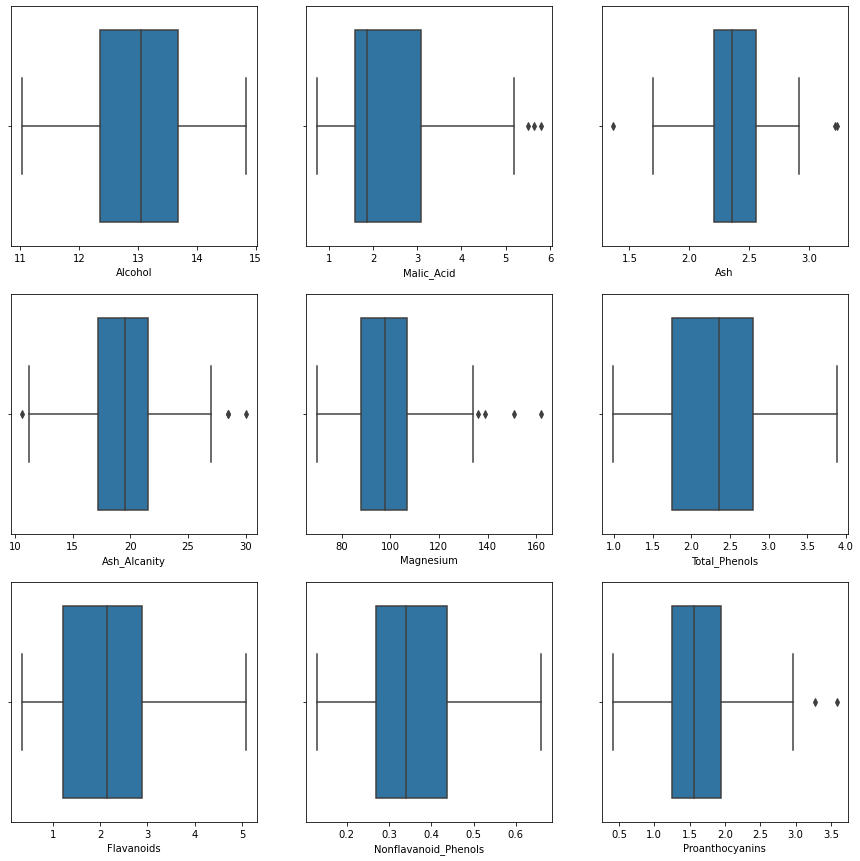

In [13]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,15))
ax=ax.flatten()
int_cols= data.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(data[i], ax=ax[x])
plt.show()

In [14]:
data1=data.copy()
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Exports

Imports

In [16]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [17]:
Q1 = data1['Malic_Acid'].quantile(0.25)
Q2 = data1['Malic_Acid'].quantile(0.50)
Q3 = data1['Malic_Acid'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data1['Malic_Acid']=np.where(data1['Malic_Acid']>upper_limit,upper_limit,np.where(data1['Malic_Acid']<lower_limit,lower_limit,data1['Malic_Acid']))


In [20]:
Q1 = data1['Magnesium'].quantile(0.25)
Q2 = data1['Magnesium'].quantile(0.50)
Q3 = data1['Magnesium'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data1['Magnesium']=np.where(data1['Magnesium']>upper_limit,upper_limit,np.where(data1['Magnesium']<lower_limit,lower_limit,data1['Magnesium']))


In [21]:
Q1 = data1['Proanthocyanins'].quantile(0.25)
Q2 = data1['Proanthocyanins'].quantile(0.50)
Q3 = data1['Proanthocyanins'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data1['Proanthocyanins']=np.where(data1['Proanthocyanins']>upper_limit,upper_limit,np.where(data1['Proanthocyanins']<lower_limit,lower_limit,data1['Proanthocyanins']))


IndexError: index 9 is out of bounds for axis 0 with size 9

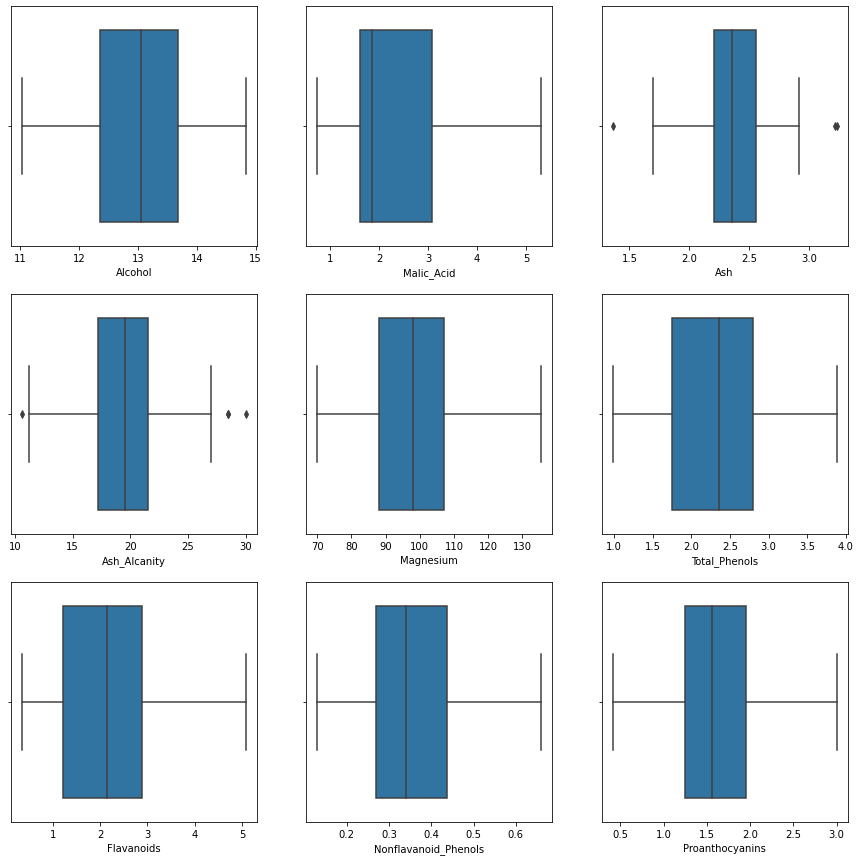

In [22]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,15))
ax=ax.flatten()
int_cols= data1.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(data1[i], ax=ax[x])
plt.show()

DataSet Scaling 

In [32]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data1.iloc[:,1:])

K-Means Clustering

In [34]:
from sklearn.cluster import KMeans
ks=range(1,9)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,init="k-means++",random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
print(inertia)

AttributeError: 'NoneType' object has no attribute 'split'

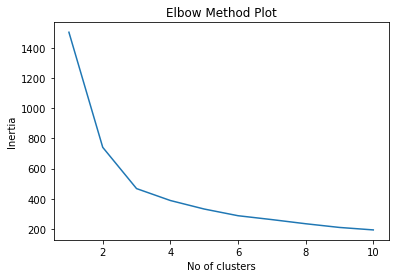

In [36]:
plt.plot(ks,inertia)
plt.title("Elbow Method Plot")
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [25]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(scaled_data)
km=model_kmeans.predict(scaled_data)
print(model_kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0
 0 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [26]:

data1['KMean_ClusterID']= pd.Series(km)
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMean_ClusterID
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


Agglomerative Heirarchial Clustering

In [2]:
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize = (8,8))
dendro = linkage(scaled_data,method = 'ward')
dendrogram(dendro, leaf_rotation = 90, leaf_font_size = 6)
plt.hlines(4,0,27000,colors="red",linestyles="dashed")
plt.show()

NameError: name 'plt' is not defined

In [1]:

model_kmeans = KMeans(n_clusters=3,max_iter=50,random_state = 50)
model_kmeans.fit(scaled_data)
labels_sc = model_kmeans.predict(scaled_data)
print(labels_sc)

NameError: name 'KMeans' is not defined

In [29]:
data1['AHC_ClusterID']= pd.Series(labels_sc)
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMean_ClusterID,AHC_ClusterID
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0


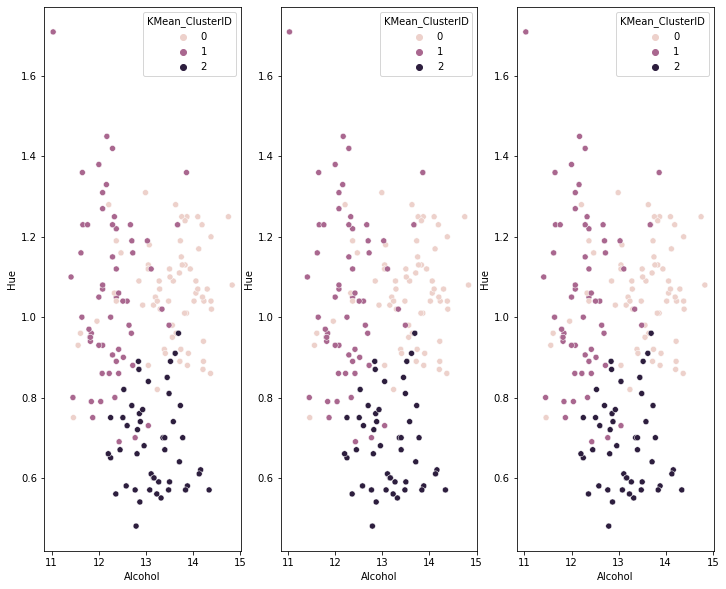

In [31]:
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
sns.scatterplot(x = 'Alcohol', y = 'Hue', data= data1, hue = 'KMean_ClusterID')
plt.subplot(1,3,2)
sns.scatterplot(x = 'Alcohol', y = 'Hue', data= data1, hue = 'KMean_ClusterID')
plt.subplot(1,3,3)
sns.scatterplot(x = 'Alcohol', y = 'Hue', data= data1, hue = 'KMean_ClusterID')
plt.show()

In [36]:
pip install numpy==1.21.3

  Using cached numpy-1.21.3-cp38-cp38-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.3
    Uninstalling numpy-1.22.3:



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.22.3.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.



Agglomerative Hierarchical Clustering model is chosen as final model as per the above observations and the above mentioned are the countries that are in the  need of aid.